In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  7 11:20:34 2020

EMD: Earth Mover's Distance
https://towardsdatascience.com/earth-movers-distance-68fff0363ef2
KLD: Kullback-Leibler Divergence

Questions:
1. How to generate various distribution in different bins?
2. How to compare the differences between two distributions?
"""

"\nCreated on Sun Jun  7 11:20:34 2020\n\nEMD: Earth Mover's Distance\nhttps://towardsdatascience.com/earth-movers-distance-68fff0363ef2\nKLD: Kullback-Leibler Divergence\n\nQuestions:\n1. How to generate various distribution in different bins?\n2. How to compare the differences between two distributions?\n"

In [3]:
from scipy.stats import wasserstein_distance, entropy
import numpy as np
from scipy.stats import binned_statistic
import random
import matplotlib.pyplot as plt

In [4]:
# 1D distribution
np.random.seed(1)

def data_gen(mode='normal', data_n=100, par1=0, par2=1, dynamic_bin=True, bin_n=10):
    tiny = 0.00000001    
    intervals  = np.linspace(par1 - 2*par2, par1 + 2*par2, bin_n) 
    
    # what a data distribution will to be generated?
    if mode == 'normal':
        data = [np.random.normal(par1, par2) for _ in range(data_n)]
    if mode == 'lognormal':
        data = [random.lognormvariate(par1, par2) for _ in range(data_n)]
    if mode =='beta':
        data = [random.betavariate(par1, par2) for _ in range(data_n)]
        
    # scipy.stats.binned_statistic(x, values, statistic='mean', bins=10, range=None)
    if dynamic_bin == True:
        # using dynamic bin interval
        bins = binned_statistic(data, data,'count', bins = intervals)
    else:
        # using a fixed bin number
        bins = binned_statistic(data, data,'count', bins = bin_n)
    dist = bins[0]/data_n # let sum of dist = 1 
    dist[dist < tiny] = tiny # avoid nan
    return data, dist

(array([ 3.,  0.,  1.,  3.,  7., 13., 14., 10., 15.,  9., 11.,  6.,  2.,
         4.,  2.]),
 array([-0.38092322, -0.20143865, -0.02195409,  0.15753047,  0.33701504,
         0.5164996 ,  0.69598417,  0.87546873,  1.05495329,  1.23443786,
         1.41392242,  1.59340699,  1.77289155,  1.95237612,  2.13186068,
         2.31134524]),
 <a list of 15 Patch objects>)

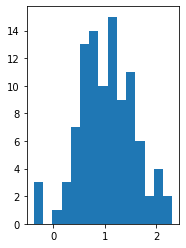

In [5]:
# generate first historgram
bin_number = 15
plt.subplot(1,2,1)
mu = 1; sigma =0.6
x, px = data_gen(mode='normal', data_n=100, par1=mu, par2=sigma, dynamic_bin=True, bin_n=bin_number)
plt.hist(x,bin_number)

(array([ 1.,  2.,  2.,  7.,  4.,  6., 13., 13., 18., 16.,  7.,  5.,  1.,
         4.,  1.]),
 array([-0.46090266, -0.26237612, -0.06384958,  0.13467696,  0.3332035 ,
         0.53173004,  0.73025657,  0.92878311,  1.12730965,  1.32583619,
         1.52436273,  1.72288927,  1.92141581,  2.11994235,  2.31846889,
         2.51699542]),
 <a list of 15 Patch objects>)

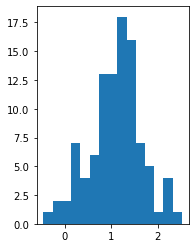

In [6]:
# generate first historgram
bin_number = 15
plt.subplot(1,2,1)
mu = 1; sigma =0.6
x, px = data_gen(mode='normal', data_n=100, par1=mu, par2=sigma, dynamic_bin=False, bin_n=bin_number)
plt.hist(x,bin_number)

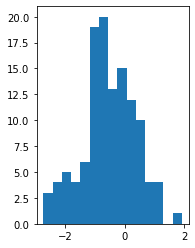

In [10]:
# generate second historgram
plt.subplot(1,2,2)
mu = 0.5; sigma =0.8
y, py = data_gen(mode='beta', data_n=250, par1=mu, par2=sigma, dynamic_bin=False, bin_n=bin_number)
y, py = data_gen(mode='normal', data_n=120, par1=-0.5, par2=0.8, dynamic_bin=False, bin_n=bin_number)
plt.hist(y,bin_number)
plt.show()

In [11]:
# KL = 0.0
# for i in range(10):
#     KL += px[i] * np.log(px[i] / py[i])
#     # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))
# print(KL)
print('KLD:', entropy(px, py))

KLD: 0.6888919709870279


度量機率分佈$ p_x\left(i\right) $ 到任意機率分佈$ p_y\left(i\right)$之間的差異
$D_{KL}(X|\left|Y\right)=\sum{p_x(i)\ln\frac{p_y\left(i\right)}{p_x\left(i\right)}}$

In [12]:
# scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)
# d = wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],[1.4, 0.9, 3.1, 7.2], [3.2, 3.5])
#data 1: [3.4, 3.9, 7.5, 7.8] with weigthts = [1.4, 0.9, 3.1, 7.2]；
#data 2: [4.5, 1.4] with weights = [3.2, 3.5]
print('equal weights of EMD:', wasserstein_distance(px, py)) 

equal weights of EMD: 0.011333332666666668


In [31]:
weights = [10,5,2,1,1,1,2,5,10]
print('various weights of EMD:', wasserstein_distance(px,weights, py,weights))

various weights of EMD: 6.993974053014054
